### Import of libraries

In [148]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from IPython.display import display

### Import of data

In [149]:
data=pd.read_csv("listings.csv", low_memory=False)
pd.set_option('display.max_columns', None)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            42931 non-null  float64
 1   name                          42919 non-null  object 
 2   description                   42178 non-null  object 
 3   neighborhood_overview         24870 non-null  object 
 4   host_name                     42926 non-null  object 
 5   host_since                    42926 non-null  object 
 6   host_response_time            28399 non-null  object 
 7   host_response_rate            28399 non-null  object 
 8   host_acceptance_rate          30367 non-null  object 
 9   host_is_superhost             42906 non-null  object 
 10  host_neighbourhood            34281 non-null  object 
 11  host_listings_count           42926 non-null  float64
 12  host_total_listings_count     42926 non-null  float64
 13  n

In [151]:
data.head()

,id,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,8.020000e+17,A home away from home,The whole group will be comfortable in this sp...,NaN,Michael,10-01-2023,NaN,NaN,NaN,f,Canarsie,1.0,1.0,NaN,Canarsie,Brooklyn,Private room in home,Private room,2,1 bath,1.0,1.0,"[""50\"" TV"", ""Bathtub"", ""Microwave"", ""Free driv...",143,2,30,t,30,60,90,364,06-03-2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,7.660000e+17,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,NaN,Eric,22-11-2022,within an hour,100%,100%,f,Canarsie,2.0,5.0,NaN,Canarsie,Brooklyn,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Carbon monoxide ...",30,2,1125,t,15,19,38,41,06-03-2023,13,4.85,4.77,4.77,4.85,4.92,4.85,4.92,t,4.29
2,6.360000e+17,Villa Masino.,Close to beach Peaceful walk to park & beach...,NaN,Tommaso,27-05-2022,NaN,NaN,NaN,f,Tottenville,1.0,1.0,NaN,Tottenville,Staten Island,Entire villa,Entire home/apt,6,2 baths,2.0,2.0,"[""BBQ grill"", ""Security cameras on property"", ...",157,1,365,t,30,60,90,364,06-03-2023,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
3,7.680000e+17,1-Bedroom Private Room with King Size Bed,Private room with king size bedroom near Sheep...,NaN,Suliman,18-08-2022,within an hour,99%,98%,t,Brighton Beach,7.0,7.0,NaN,Sheepshead Bay,Brooklyn,Private room in home,Private room,2,2 baths,3.0,1.0,"[""Security cameras on property"", ""Keypad"", ""Ca...",89,1,20,t,30,60,90,364,06-03-2023,15,5.00,5.00,4.87,5.00,5.00,5.00,5.00,t,5.17
4,4.924826e+07,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,Katherine,16-04-2021,within an hour,75%,68%,f,North Riverdale,1.0,2.0,"The Bronx, New York, United States",North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125,3,21,t,3,17,46,46,06-03-2023,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1.11


## Data Cleaning

### Removing duplicate entries

In [152]:
data.duplicated()
data.drop_duplicates(inplace=True)

### Number of null entries in each column

In [153]:
null=data.isnull().sum()
null

id                                  0
name                               12
description                       753
neighborhood_overview           18061
host_name                           5
host_since                          5
host_response_time              14525
host_response_rate              14525
host_acceptance_rate            12562
host_is_superhost                  25
host_neighbourhood               8643
host_listings_count                 5
host_total_listings_count           5
neighbourhood                   18060
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                     75
bedrooms                         3844
beds                              929
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availabi

### Removing null entries

In [154]:
data.dropna(inplace=True)
data

,id,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
4,4.924826e+07,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,Katherine,16-04-2021,within an hour,75%,68%,f,North Riverdale,1.0,2.0,"The Bronx, New York, United States",North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125,3,21,t,3,17,46,46,06-03-2023,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1.11
5,5.205998e+07,Room 1,房间内带有两个标准的单人床，室内带有储藏室，宽敞舒适，氛围温馨。<br /><br /><b...,出门就有一个小公园，是晨练的好去处，不行2分钟到达巴士站，不行5分钟周围有多个各类人群的大型...,Helen,26-01-2019,within an hour,100%,99%,f,Flushing,3.0,7.0,"Queens, New York, United States",Flushing,Queens,Private room in rental unit,Private room,3,1 shared bath,1.0,1.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Hot water...",63,2,365,t,14,44,74,349,06-03-2023,40,4.68,4.88,4.55,4.78,4.78,4.93,4.68,t,2.26
9,6.726337e+06,Beautiful 2 Bedroom Apartment!! NYC,Beautiful 2 bedroom Apartment!! it has everyth...,Very Safe and Friendly,Rony,17-09-2014,within an hour,100%,29%,t,Kingsbridge,2.0,2.0,"RIVERDALE, New York, United States",Kingsbridge,Bronx,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Dishwashe...",115,30,1125,t,18,48,78,209,06-03-2023,16,5.00,4.93,4.93,4.93,4.93,4.80,4.73,f,0.17
11,7.550000e+17,Queens Haunted House w/ Escape Room Themes-JFK...,Unique listing! This famous #1 Rated Haunted H...,"Central Location Near UBS Arena, JFK Airport a...",Janette,07-11-2022,within an hour,100%,100%,f,Jamaica,1.0,1.0,"Queens, New York, United States",Queens Village,Queens,Entire home,Entire home/apt,4,1 bath,3.0,5.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",179,1,1125,t,27,54,84,359,06-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,2.00
15,6.000000e+17,2-bedroom beach house with backyard and hot tub,Bring the whole family to this great place wit...,"The neighbor has parks, beaches, and restauran...",Shawn,18-12-2020,within an hour,100%,100%,t,Far Rockaway,3.0,3.0,"Queens, New York, United States",Edgemere,Queens,Entire home,Entire home/apt,6,2 baths,2.0,3.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",380,1,1125,t,30,60,88,346,06-03-2023,8,4.88,4.88,5.00,5.00,5.00,4.88,4.75,f,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42875,4.008350e+07,2 Bedroom Apt in heart of the Upper West Side,This is a two bedroom apartment in a beautiful...,Located in a prime Upper West Side less than a...,Mendel,13-11-2019,within an hour,100%,100%,f,Upper West Side,2.0,2.0,"New York, United States",Upper West Side,Manhattan,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet and dres...",160,30,1125,t,0,21,23,42,07-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.06
42891,5.590000e+17,"Warm, artsy Brownstone in Historic Bed-Stuy",Make your trip to memorable by staying in my b...,In 2020 BedStuy was proclaimed the fourth cool...,Tiffany,22-12-2011,within an hour,100%,100%,f,Crown Heights,2.0,3.0,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,Entire townhouse,Entire home/apt,4,1.5 baths,2.0,2.0,"[""BBQ grill"", ""Bath

### Dropping id column

In [155]:
data.drop(['id'],axis=1)

,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
4,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,Katherine,16-04-2021,within an hour,75%,68%,f,North Riverdale,1.0,2.0,"The Bronx, New York, United States",North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125,3,21,t,3,17,46,46,06-03-2023,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1.11
5,Room 1,房间内带有两个标准的单人床，室内带有储藏室，宽敞舒适，氛围温馨。<br /><br /><b...,出门就有一个小公园，是晨练的好去处，不行2分钟到达巴士站，不行5分钟周围有多个各类人群的大型...,Helen,26-01-2019,within an hour,100%,99%,f,Flushing,3.0,7.0,"Queens, New York, United States",Flushing,Queens,Private room in rental unit,Private room,3,1 shared bath,1.0,1.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Hot water...",63,2,365,t,14,44,74,349,06-03-2023,40,4.68,4.88,4.55,4.78,4.78,4.93,4.68,t,2.26
9,Beautiful 2 Bedroom Apartment!! NYC,Beautiful 2 bedroom Apartment!! it has everyth...,Very Safe and Friendly,Rony,17-09-2014,within an hour,100%,29%,t,Kingsbridge,2.0,2.0,"RIVERDALE, New York, United States",Kingsbridge,Bronx,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Dishwashe...",115,30,1125,t,18,48,78,209,06-03-2023,16,5.00,4.93,4.93,4.93,4.93,4.80,4.73,f,0.17
11,Queens Haunted House w/ Escape Room Themes-JFK...,Unique listing! This famous #1 Rated Haunted H...,"Central Location Near UBS Arena, JFK Airport a...",Janette,07-11-2022,within an hour,100%,100%,f,Jamaica,1.0,1.0,"Queens, New York, United States",Queens Village,Queens,Entire home,Entire home/apt,4,1 bath,3.0,5.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",179,1,1125,t,27,54,84,359,06-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,2.00
15,2-bedroom beach house with backyard and hot tub,Bring the whole family to this great place wit...,"The neighbor has parks, beaches, and restauran...",Shawn,18-12-2020,within an hour,100%,100%,t,Far Rockaway,3.0,3.0,"Queens, New York, United States",Edgemere,Queens,Entire home,Entire home/apt,6,2 baths,2.0,3.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",380,1,1125,t,30,60,88,346,06-03-2023,8,4.88,4.88,5.00,5.00,5.00,4.88,4.75,f,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42875,2 Bedroom Apt in heart of the Upper West Side,This is a two bedroom apartment in a beautiful...,Located in a prime Upper West Side less than a...,Mendel,13-11-2019,within an hour,100%,100%,f,Upper West Side,2.0,2.0,"New York, United States",Upper West Side,Manhattan,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet and dres...",160,30,1125,t,0,21,23,42,07-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.06
42891,"Warm, artsy Brownstone in Historic Bed-Stuy",Make your trip to memorable by staying in my b...,In 2020 BedStuy was proclaimed the fourth cool...,Tiffany,22-12-2011,within an hour,100%,100%,f,Crown Heights,2.0,3.0,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,Entire townhouse,Entire home/apt,4,1.5 baths,2.0,2.0,"[""BBQ grill"", ""Bathtub"", ""Microwave"", ""Indoor ...",221,3,365,t,0,0,0,0,07-03-2023,10,4.90,4.80,4.80,5.00,4.80,4.8

### Resetting Index of the dataframe

In [156]:
data.reset_index(drop=True, inplace=True)
data

,id,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,4.924826e+07,Get the best of both worlds in Riverdale!,Welcome to the greatest location if you desire...,You will find within walking distance the Metr...,Katherine,16-04-2021,within an hour,75%,68%,f,North Riverdale,1.0,2.0,"The Bronx, New York, United States",North Riverdale,Bronx,Entire rental unit,Entire home/apt,3,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet"", ""Secur...",125,3,21,t,3,17,46,46,06-03-2023,25,4.48,4.56,4.44,4.72,4.88,4.72,4.64,f,1.11
1,5.205998e+07,Room 1,房间内带有两个标准的单人床，室内带有储藏室，宽敞舒适，氛围温馨。<br /><br /><b...,出门就有一个小公园，是晨练的好去处，不行2分钟到达巴士站，不行5分钟周围有多个各类人群的大型...,Helen,26-01-2019,within an hour,100%,99%,f,Flushing,3.0,7.0,"Queens, New York, United States",Flushing,Queens,Private room in rental unit,Private room,3,1 shared bath,1.0,1.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Hot water...",63,2,365,t,14,44,74,349,06-03-2023,40,4.68,4.88,4.55,4.78,4.78,4.93,4.68,t,2.26
2,6.726337e+06,Beautiful 2 Bedroom Apartment!! NYC,Beautiful 2 bedroom Apartment!! it has everyth...,Very Safe and Friendly,Rony,17-09-2014,within an hour,100%,29%,t,Kingsbridge,2.0,2.0,"RIVERDALE, New York, United States",Kingsbridge,Bronx,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Dishwashe...",115,30,1125,t,18,48,78,209,06-03-2023,16,5.00,4.93,4.93,4.93,4.93,4.80,4.73,f,0.17
3,7.550000e+17,Queens Haunted House w/ Escape Room Themes-JFK...,Unique listing! This famous #1 Rated Haunted H...,"Central Location Near UBS Arena, JFK Airport a...",Janette,07-11-2022,within an hour,100%,100%,f,Jamaica,1.0,1.0,"Queens, New York, United States",Queens Village,Queens,Entire home,Entire home/apt,4,1 bath,3.0,5.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",179,1,1125,t,27,54,84,359,06-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,2.00
4,6.000000e+17,2-bedroom beach house with backyard and hot tub,Bring the whole family to this great place wit...,"The neighbor has parks, beaches, and restauran...",Shawn,18-12-2020,within an hour,100%,100%,t,Far Rockaway,3.0,3.0,"Queens, New York, United States",Edgemere,Queens,Entire home,Entire home/apt,6,2 baths,2.0,3.0,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",380,1,1125,t,30,60,88,346,06-03-2023,8,4.88,4.88,5.00,5.00,5.00,4.88,4.75,f,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10240,4.008350e+07,2 Bedroom Apt in heart of the Upper West Side,This is a two bedroom apartment in a beautiful...,Located in a prime Upper West Side less than a...,Mendel,13-11-2019,within an hour,100%,100%,f,Upper West Side,2.0,2.0,"New York, United States",Upper West Side,Manhattan,Entire rental unit,Entire home/apt,2,1 bath,2.0,2.0,"[""Hangers"", ""Clothing storage: closet and dres...",160,30,1125,t,0,21,23,42,07-03-2023,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.06
10241,5.590000e+17,"Warm, artsy Brownstone in Historic Bed-Stuy",Make your trip to memorable by staying in my b...,In 2020 BedStuy was proclaimed the fourth cool...,Tiffany,22-12-2011,within an hour,100%,100%,f,Crown Heights,2.0,3.0,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,Entire townhouse,Entire home/apt,4,1.5 baths,2.0,2.0,"[""BBQ grill"", ""Bathtu

# Descriptive Analysis

## Mean price of AirBnBs in the each Borough in New York City

  neighbourhood_group_cleansed       price
0                        Bronx  107.433022
1                     Brooklyn  182.126398
2                    Manhattan  236.300408
3                       Queens  126.456042
4                Staten Island  512.469880


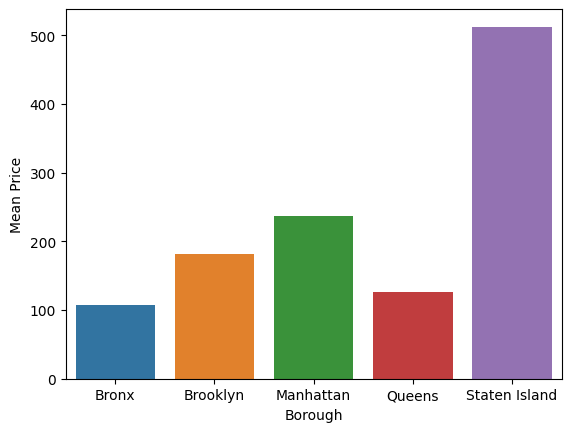

Staten Island seems to be the most expensive Borough in New York, while Manhattan being the second and so on.


In [157]:
data_newyork=data.groupby('neighbourhood_group_cleansed')['price'].mean()
data_newyork=pd.DataFrame(data_newyork)
data_newyork.reset_index(inplace=True)
print(data_newyork)
sns.barplot(data=data_newyork,x='neighbourhood_group_cleansed',y='price')
plt.xlabel('Borough')
plt.ylabel('Mean Price')
plt.show()
print("Staten Island seems to be the most expensive Borough in New York, while Manhattan being the second and so on.")

### Price Variations in Bronx

   neighbourhood_cleansed       price
0                Allerton  115.666667
1              Baychester   98.400000
2                 Belmont  115.500000
3               Bronxdale  107.428571
4             Castle Hill  136.500000
5             City Island  166.250000
6       Claremont Village  133.583333
7            Clason Point   98.720000
8              Co-op City   51.000000
9               Concourse  117.346154
10      Concourse Village   93.842105
11           Country Club   95.000000
12            Eastchester  161.333333
13               Edenwald  100.583333
14              Fieldston   92.666667
15                Fordham   80.100000
16             Highbridge   72.600000
17            Hunts Point   56.750000
18            Kingsbridge  110.320000
19               Longwood  125.578947
20                Melrose   90.000000
21         Morris Heights   72.666667
22            Morris Park   83.285714
23             Morrisania   98.500000
24             Mott Haven  115.117647
25          

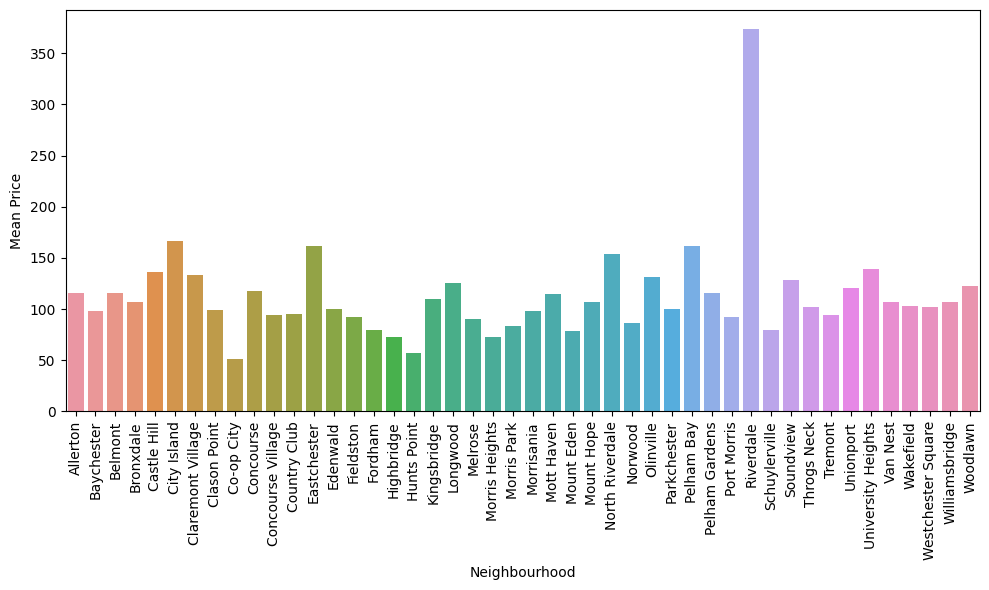

In [158]:
data_Bronx=data[data['neighbourhood_group_cleansed']=='Bronx'].groupby(['neighbourhood_cleansed'])['price'].mean()
data_Bronx=pd.DataFrame(data_Bronx)
data_Bronx.reset_index(inplace=True)
print(data_Bronx)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_Bronx,x='neighbourhood_cleansed',y='price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

### Price Variations in Brooklyn

       neighbourhood_cleansed       price
0                  Bath Beach  161.555556
1                   Bay Ridge  119.145455
2          Bedford-Stuyvesant  149.790061
3                 Bensonhurst  118.312500
4                Bergen Beach  164.285714
5                 Boerum Hill  297.285714
6                Borough Park   79.954545
7              Brighton Beach  113.111111
8            Brooklyn Heights  276.050000
9                 Brownsville  125.739130
10                   Bushwick  146.886836
11                   Canarsie  131.891892
12            Carroll Gardens  250.660377
13               Clinton Hill  216.723214
14                Cobble Hill  252.956522
15                Columbia St  196.750000
16               Coney Island   99.307692
17              Crown Heights  148.528536
18              Cypress Hills  115.077922
19                      DUMBO  229.166667
20          Downtown Brooklyn  264.125000
21              Dyker Heights  157.333333
22              East Flatbush  120

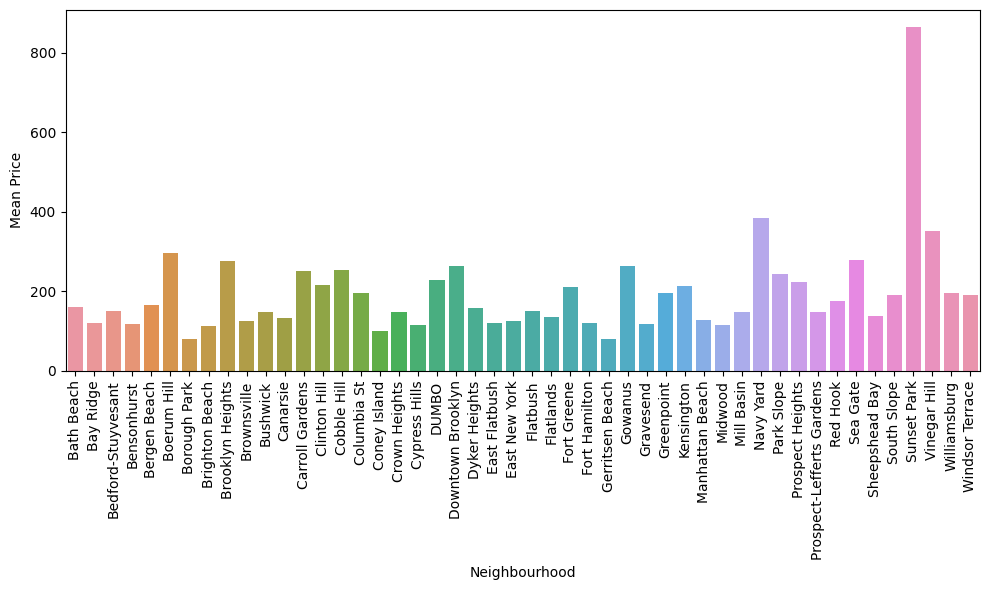

In [159]:
data_Brooklyn=data[data['neighbourhood_group_cleansed']=='Brooklyn'].groupby(['neighbourhood_cleansed'])['price'].mean()
data_Brooklyn=pd.DataFrame(data_Brooklyn)
data_Brooklyn.reset_index(inplace=True)
print(data_Brooklyn)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_Brooklyn,x='neighbourhood_cleansed',y='price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

### Price Variations in Manhattan

   neighbourhood_cleansed       price
0       Battery Park City  232.500000
1                 Chelsea  296.177083
2               Chinatown  212.785714
3            Civic Center  416.750000
4             East Harlem  134.185185
5            East Village  259.245161
6      Financial District  323.772727
7       Flatiron District  265.000000
8                Gramercy  271.230769
9       Greenwich Village  348.000000
10                 Harlem  149.625604
11         Hell's Kitchen  272.673469
12                 Inwood   86.594595
13               Kips Bay  246.547619
14           Little Italy  191.636364
15        Lower East Side  218.541667
16            Marble Hill  123.750000
17                Midtown  425.052326
18    Morningside Heights  117.571429
19            Murray Hill  261.843137
20                   NoHo  261.200000
21                 Nolita  299.400000
22       Roosevelt Island  111.200000
23                   SoHo  450.416667
24        Stuyvesant Town   59.000000
25       The

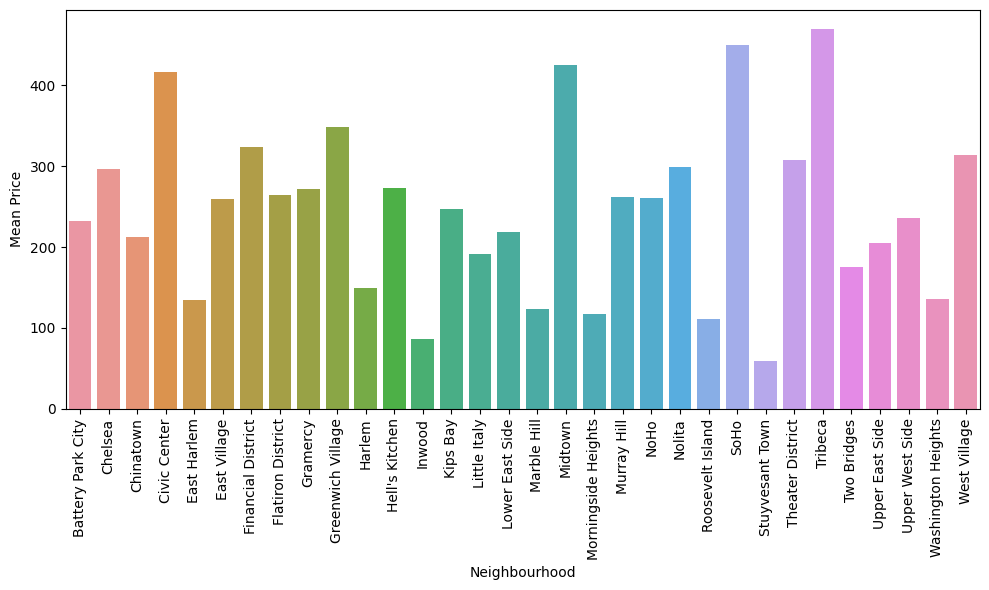

In [160]:
data_Manhattan=data[data['neighbourhood_group_cleansed']=='Manhattan'].groupby(['neighbourhood_cleansed'])['price'].mean()
data_Manhattan=pd.DataFrame(data_Manhattan)
data_Manhattan.reset_index(inplace=True)
print(data_Manhattan)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_Manhattan,x='neighbourhood_cleansed',y='price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

### Price Variations in Queens

   neighbourhood_cleansed       price
0                 Arverne  182.240000
1                 Astoria  120.326446
2             Bay Terrace  146.333333
3                 Bayside  209.684211
4               Bayswater  114.875000
5            Belle Harbor  200.600000
6               Bellerose  141.916667
7               Briarwood   86.529412
8         Cambria Heights  141.708333
9           College Point  129.384615
10                 Corona   86.317073
11       Ditmars Steinway  133.989130
12             Douglaston   48.666667
13          East Elmhurst  107.032787
14               Edgemere  260.285714
15               Elmhurst   73.212121
16           Far Rockaway  169.586207
17               Flushing  111.773399
18           Forest Hills  186.826923
19          Fresh Meadows  126.650000
20               Glendale   95.695652
21                 Hollis   66.000000
22             Holliswood   89.000000
23           Howard Beach  144.684211
24        Jackson Heights  179.111111
25          

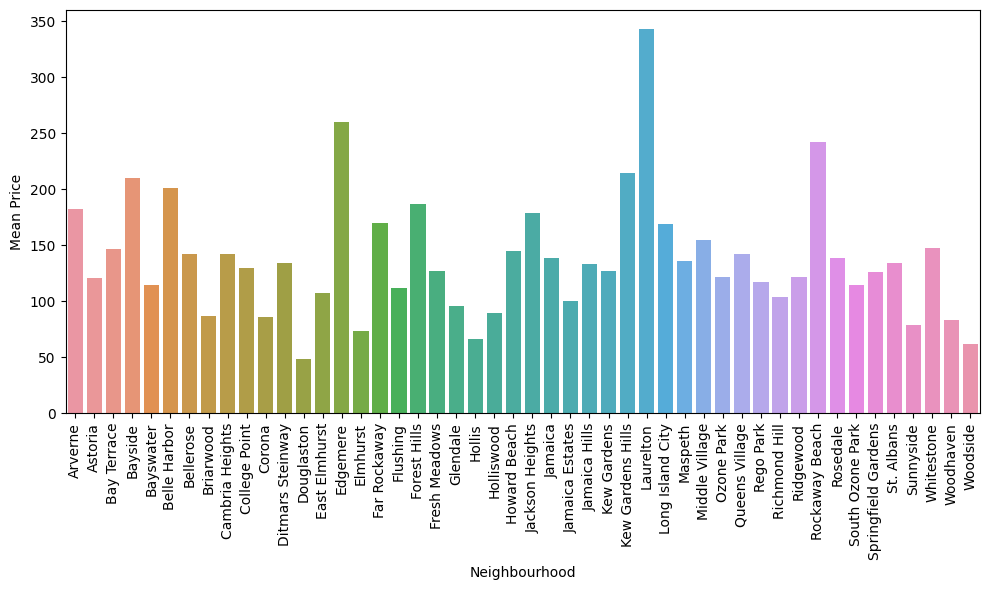

In [161]:
data_Queens=data[data['neighbourhood_group_cleansed']=='Queens'].groupby(['neighbourhood_cleansed'])['price'].mean()
data_Queens=pd.DataFrame(data_Queens)
data_Queens.reset_index(inplace=True)
print(data_Queens)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_Queens,x='neighbourhood_cleansed',y='price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.tight_layout()
plt.show()

### Price Variations in Staten Island

    neighbourhood_cleansed        price
0            Arden Heights    95.000000
1                 Arrochar    95.166667
2   Chelsea, Staten Island   102.000000
3                  Clifton   116.250000
4                  Concord   127.666667
5             Dongan Hills   196.666667
6              Eltingville   116.666667
7             Graniteville    99.000000
8               Grant City    47.833333
9              Great Kills   104.500000
10             Grymes Hill   198.250000
11            Howland Hook   125.000000
12                Huguenot   152.500000
13         Lighthouse Hill   250.000000
14         Mariners Harbor   103.583333
15           Midland Beach   111.166667
16            New Brighton    59.500000
17          New Dorp Beach    61.000000
18         New Springville   200.000000
19                 Oakwood   136.250000
20           Port Richmond    81.000000
21            Prince's Bay   115.666667
22           Randall Manor    97.333333
23            Richmondtown    81.000000


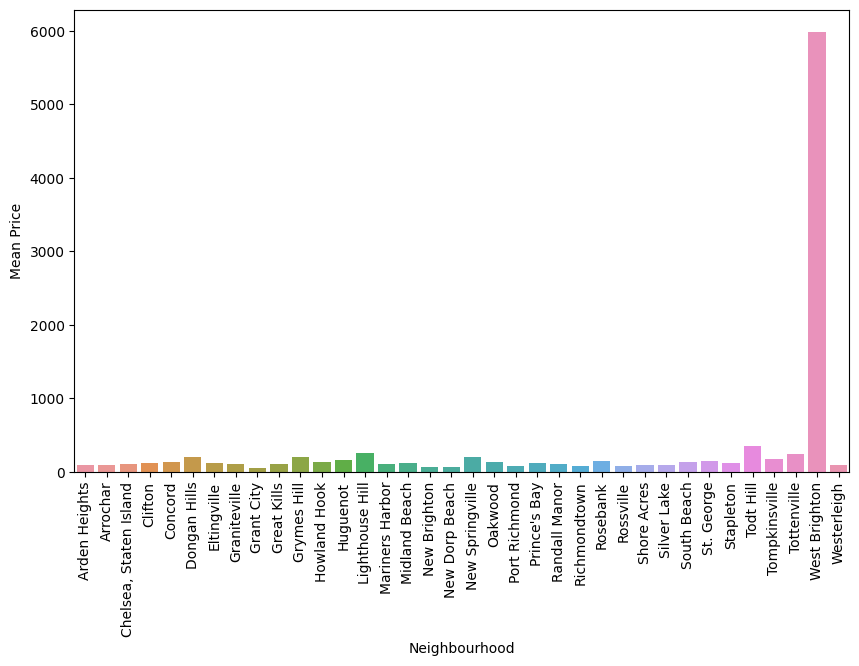

In [162]:
data_staten=data[data['neighbourhood_group_cleansed']=='Staten Island'].groupby(['neighbourhood_cleansed'])['price'].mean()
data_staten=pd.DataFrame(data_staten)
data_staten.reset_index(inplace=True)
print(data_staten)
plt.figure(figsize=(10, 6))
sns.barplot(data=data_staten,x='neighbourhood_cleansed',y='price')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.ylabel('Mean Price')
plt.show()

## Price Variations according to Ratings

### By Number of Ratings

     number_of_reviews       price
0                    1  175.714286
1                    2  161.602273
2                    3  155.086854
3                    4  177.373529
4                    5  161.373665
..                 ...         ...
424                746   81.000000
425                763   66.000000
426                789  200.000000
427               1010  135.000000
428               1642  155.000000

[429 rows x 2 columns]


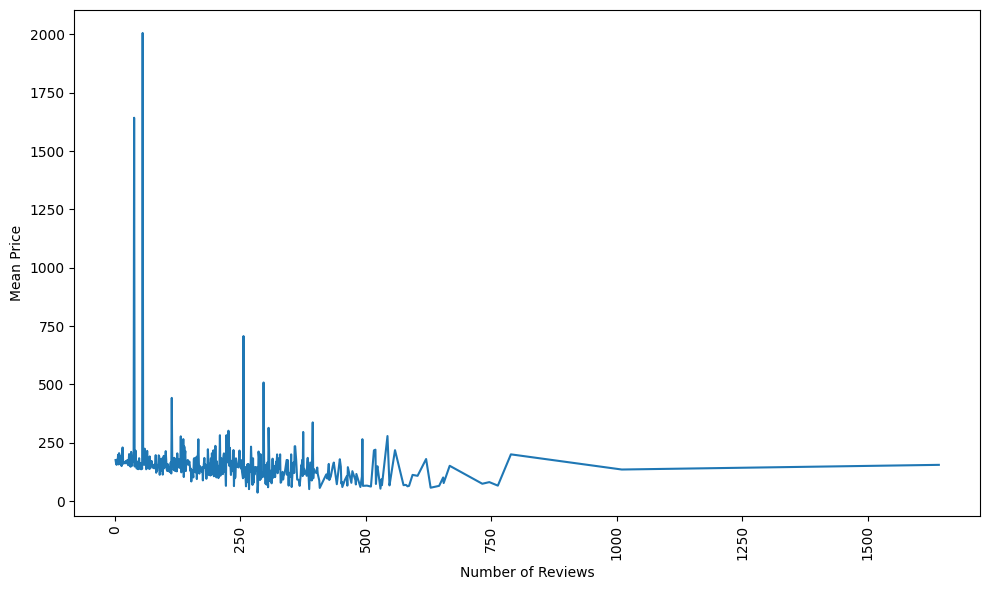

In [163]:
Data_no_of_ratings=data.groupby('number_of_reviews')['price'].mean()
Data_no_of_ratings=pd.DataFrame(Data_no_of_ratings)
Data_no_of_ratings.reset_index(inplace=True)
print(Data_no_of_ratings)
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_no_of_ratings,x='number_of_reviews',y='price')
plt.xlabel('Number of Reviews')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### By Overall Ratings

     review_scores_rating       price
0                    1.00   98.071429
1                    1.50   38.500000
2                    2.00  119.241379
3                    2.33  344.000000
4                    2.50   42.166667
..                    ...         ...
134                  4.96  185.637500
135                  4.97  796.724638
136                  4.98  208.628866
137                  4.99  184.826087
138                  5.00  198.237895

[139 rows x 2 columns]


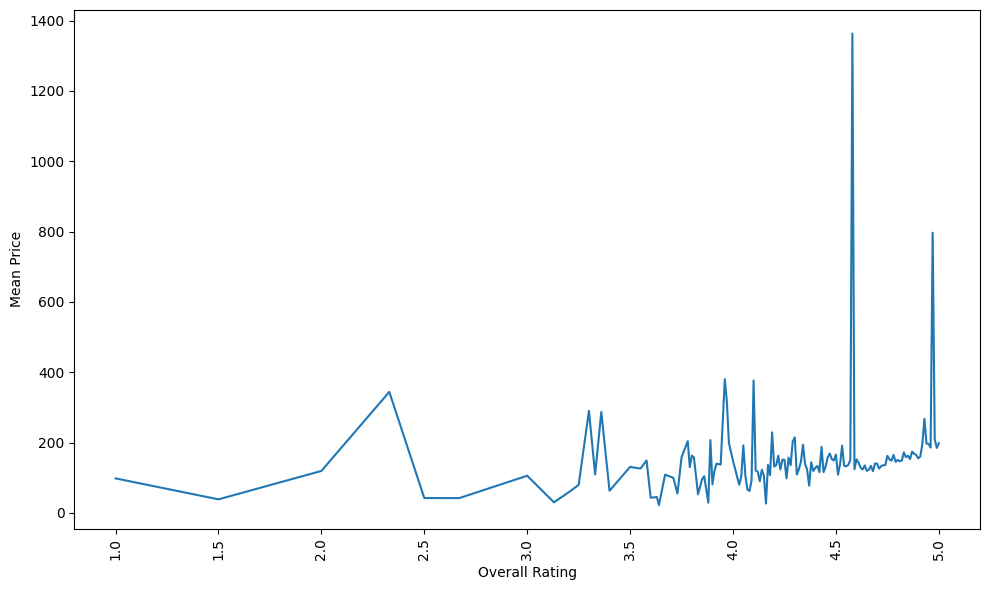

In [164]:
Data_overall_rating=data.groupby('review_scores_rating')['price'].mean()
Data_overall_rating=pd.DataFrame(Data_overall_rating)
Data_overall_rating.reset_index(inplace=True)
print(Data_overall_rating)
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_overall_rating,x='review_scores_rating',y='price')
plt.xlabel('Overall Rating')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### By Criterial Ratings

In [165]:
# Data_critera_rating=data.groupby('review_scores_rating')['price'].mean()
Data_critera_rating=data.groupby(['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location'])['price'].mean()
Data_critera_rating=pd.DataFrame(Data_critera_rating)
Data_critera_rating.reset_index(inplace=True)
print(Data_critera_rating)

      review_scores_cleanliness  review_scores_checkin  \
0                           1.0                    1.0   
1                           1.0                    1.0   
2                           1.0                    1.0   
3                           1.0                    1.5   
4                           1.0                    2.0   
...                         ...                    ...   
7473                        5.0                    5.0   
7474                        5.0                    5.0   
7475                        5.0                    5.0   
7476                        5.0                    5.0   
7477                        5.0                    5.0   

      review_scores_communication  review_scores_location       price  
0                             1.0                    1.00  136.909091  
1                             1.0                    3.00   61.500000  
2                             3.0                    1.00   80.000000  
3              

#### Cleanliness

Text(0, 0.5, 'Mean Price')

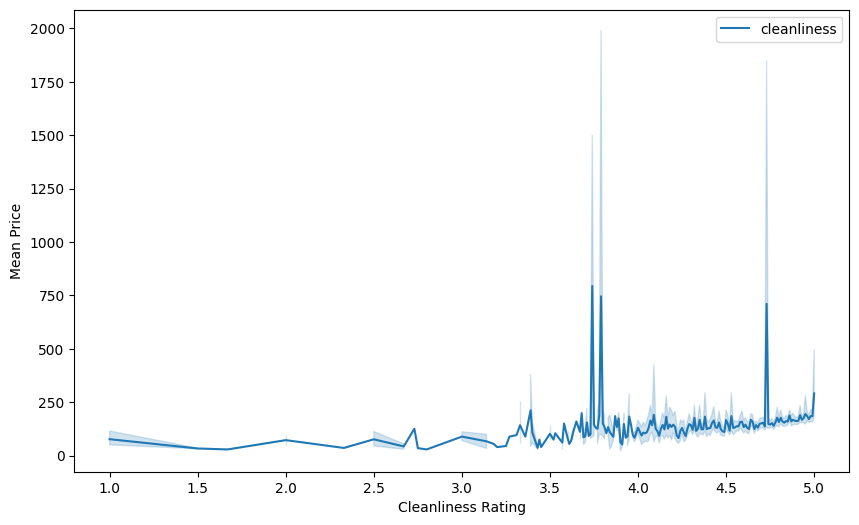

In [166]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_critera_rating,x='review_scores_cleanliness',y='price',label='cleanliness')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Mean Price')

#### Ease of Check-in

Text(0, 0.5, 'Mean Price')

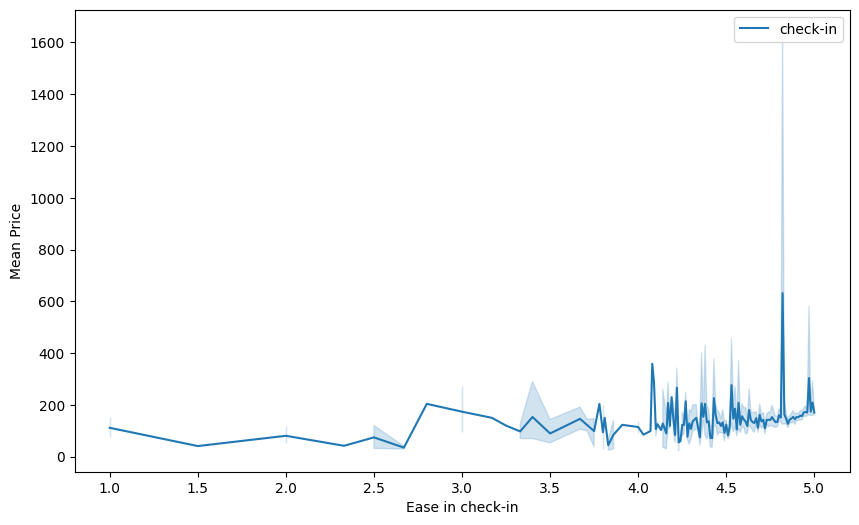

In [167]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_critera_rating,x='review_scores_checkin',y='price',label='check-in')
plt.xlabel('Ease in check-in')
plt.ylabel('Mean Price')

#### Host Communication

Text(0, 0.5, 'Mean Price')

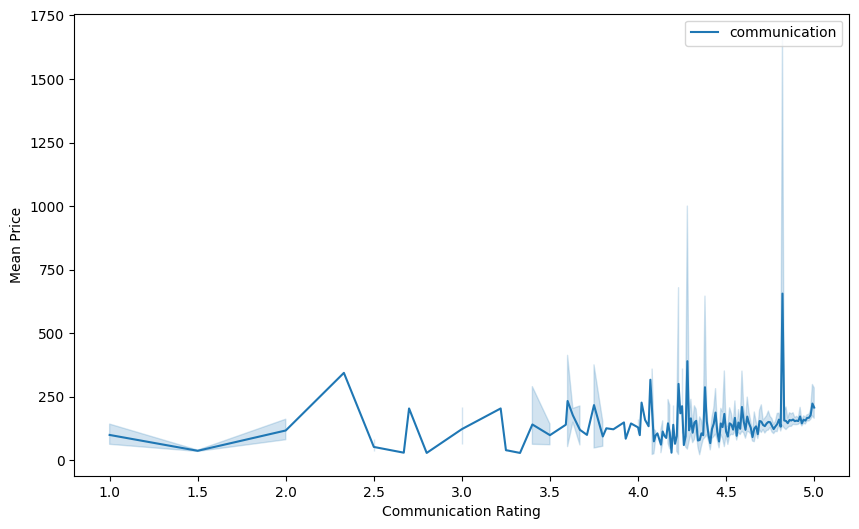

In [168]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_critera_rating,x='review_scores_communication',y='price',label='communication')
plt.xlabel('Communication Rating')
plt.ylabel('Mean Price')

#### Location

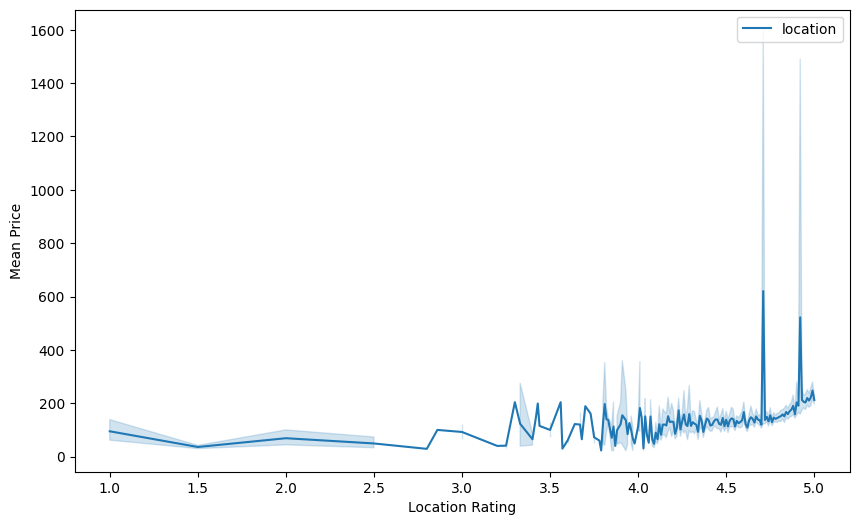

In [169]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data_critera_rating,x='review_scores_location',y='price',label='location')
plt.xlabel('Location Rating')
plt.ylabel('Mean Price')
plt.show()

## Price Variation According to Amenities

### Type of Amenities

In [170]:
filtered_data = data[data['amenities'].str.contains('wifi|fast wifi|ethernet', case=False, na=False) & data['amenities'].str.contains('air conditioning|Central air conditioning', case=False, na=False)]
display(filtered_data[['amenities', 'price']])
filtered_data.to_csv('filtered_data.csv', index=False)

# prices=filtered_data['price']
# plt.plot(prices)
# plt.xlabel("Indices")
# plt.show

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_data,x='',y='price')
# # plt.xlabel('Amenities')
# # plt.ylabel('Mean Price')
# # plt.xticks(rotation=90)
# # plt.tight_layout()
# plt.show()


,amenities,price
1,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Hot water...",63
2,"[""Hangers"", ""Bathtub"", ""Microwave"", ""Dishwashe...",115
3,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",179
4,"[""Hangers"", ""BBQ grill"", ""Security cameras on ...",380
7,"[""Hangers"", ""BBQ grill"", ""Garden view"", ""Micro...",216
...,...,...
10238,"[""Hangers"", ""Security cameras on property"", ""B...",169
10240,"[""Hangers"", ""Clothing storage: closet and dres...",160
10241,"[""BBQ grill"", ""Bathtub"", ""Microwave"", ""Indoor ...",221
10243,"[""Hangers"", ""Microwave"", ""Dishes and silverwar...",33


### Number of Amenities

   amenities_range       price
0          (0, 10]   76.306733
1         (10, 20]  131.729778
2         (20, 30]  183.929111
3         (30, 40]  164.875478
4         (40, 50]  207.198621
5         (50, 60]  196.204678
6         (60, 70]  248.434238
7         (70, 80]  353.188679
8         (80, 90]  269.157895
9        (90, 100]  210.800000
10      (100, 110]  302.000000


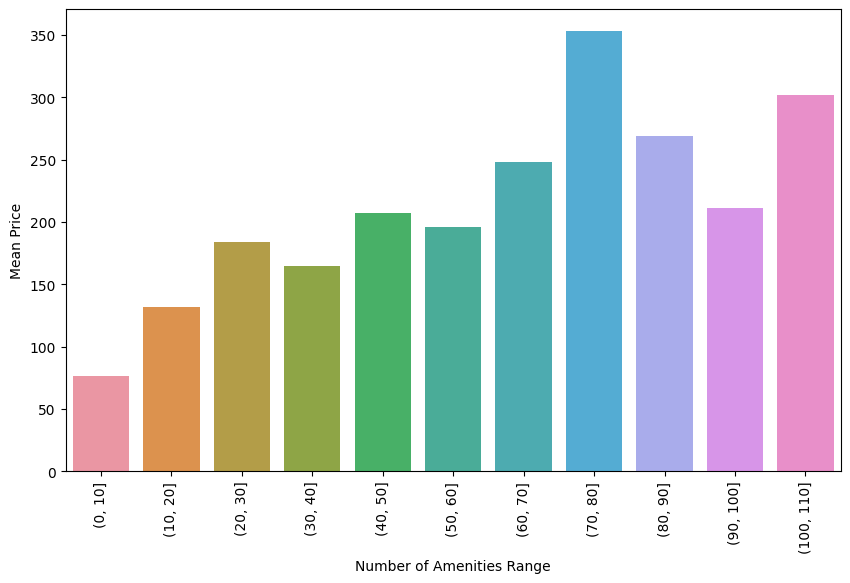

In [171]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110]
data.loc[:,'num_amenities'] = data['amenities'].str.count(',') + 1
data['amenities_range'] = pd.cut(data['num_amenities'], bins)
price_by_amenities_range = data.groupby('amenities_range')['price'].mean()
price_by_amenities_range=pd.DataFrame(price_by_amenities_range)
price_by_amenities_range.reset_index(inplace=True)
print(price_by_amenities_range)

plt.figure(figsize=(10, 6))
sns.barplot(data=price_by_amenities_range,x='amenities_range', y='price')
plt.xlabel('Number of Amenities Range')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

## Price Variation by Room Type

         room_type       price
0  Entire home/apt  215.203376
1       Hotel room  295.756757
2     Private room  131.762094
3      Shared room   82.880597


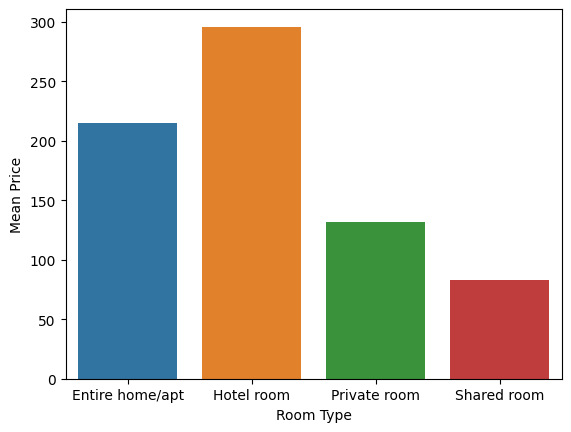

In [173]:
data_room_type=data.groupby('room_type')['price'].mean()
data_room_type=pd.DataFrame(data_room_type)
data_room_type.reset_index(inplace=True)
print(data_room_type)
sns.barplot(data=data_room_type,x='room_type',y='price')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.show()

## Types of accomodation by their numbers

In [175]:
room_count = data.groupby('room_type').count()


,id,name,description,neighborhood_overview,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,num_amenities,amenities_range
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043
Hotel room,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Private room,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031,4031
Shared room,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
